In [1]:
from espuma import Case_Directory
import os 

FOAM_TUTORIALS = os.environ["FOAM_TUTORIALS"]

In [2]:
of_template = Case_Directory(f"{FOAM_TUTORIALS}/multiphase/interFoam/laminar/damBreak/damBreak")
of_case = Case_Directory.clone_from_template(of_template, "example_dam_break", overwrite=True)

foamCloneCase /opt/openfoam7/tutorials/multiphase/interFoam/laminar/damBreak/damBreak example_dam_break finished successfully!


In [3]:
of_case

Case_Directory(/home/edsaa/Repositories/foamy/examples/example_dam_break)

In [4]:
of_case.zero

Zero_Directory(/home/edsaa/Repositories/foamy/examples/example_dam_break/0)

In [5]:
of_case.system.setFieldsDict

Dict_File(/home/edsaa/Repositories/foamy/examples/example_dam_break/system/setFieldsDict)

In [6]:
import shutil

shutil.copyfile(
    getattr(of_case.zero, "alpha.water.orig").path,
    of_case.zero.path / "alpha.water"
)

PosixPath('/home/edsaa/Repositories/foamy/examples/example_dam_break/0/alpha.water')

In [7]:
of_case.zero

Zero_Directory(/home/edsaa/Repositories/foamy/examples/example_dam_break/0)

In [8]:
of_case._blockMesh()

blockMesh finished successfully!


In [9]:
of_case._setFields()

setFields finished successfully!


In [10]:
of_case.constant

Constant_Directory(/home/edsaa/Repositories/foamy/examples/example_dam_break/constant)

In [11]:
of_case.constant.transportProperties

Dict_File(/home/edsaa/Repositories/foamy/examples/example_dam_break/constant/transportProperties)

In [12]:
of_case.constant.g

Dict_File(/home/edsaa/Repositories/foamy/examples/example_dam_break/constant/g)

In [13]:
of_case.system.controlDict

Dict_File(/home/edsaa/Repositories/foamy/examples/example_dam_break/system/controlDict)

In [14]:
of_case.system.controlDict["endTime"] = "2"

In [15]:
of_case._runCase()

interFoam finished successfully!


## Postprocessing

In [16]:
reader = of_case.get_vtk_reader()

In [17]:
import pyvista as pv
pv.set_jupyter_backend("static")

## Create a postrprocessing folder in the case
(postp := of_case.path/"postProcessing").mkdir()

In [18]:
pltr = pv.Plotter(off_screen=True, notebook=False)

pltr_kwargs = dict(
    scalars="alpha.water", 
    cmap="Blues",
    clim=(0,1)
)

pltr.window_size = (300,300)
pltr.view_xy()
time_title = pltr.add_text(f"_", font_size=8, position='upper_left')

pltr.open_gif(str(postp / "dam.gif"))

for t in reader.time_values:

    reader.set_active_time_value(t)
    mesh = reader.read()
    internalMesh = mesh["internalMesh"]
    time_title.set_text(2, f"{t:.2f} s")
    pltr.add_mesh(internalMesh, **pltr_kwargs)
    pltr.zoom_camera("tight")
    pltr.zoom_camera(0.99)
    pltr.remove_scalar_bar()
    pltr.write_frame()

pltr.close()   

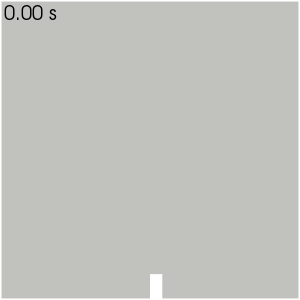

In [19]:
from IPython.display import Image
Image(of_case.path / "postProcessing/dam.gif")